In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df=pd.read_csv('Heart (3).csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Seperate data
y =df.target.values
x1=df.drop(["target"],axis=1)

In [6]:
#Normalization 
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

In [7]:
#Split For Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

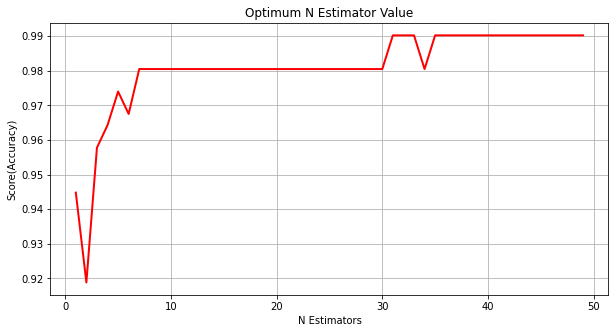

In [8]:
from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
for each in range(1,50):
    RFfind = RandomForestClassifier(n_estimators = each,random_state=5)
    RFfind.fit(xtrain,ytrain)
    scores.append(RFfind.score(xtest,ytest))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="red",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

In [9]:
RFfind= RandomForestClassifier(n_estimators = 13, random_state=5) #n_estimator = DT
start=time.time()
RFfind.fit(xtrain,ytrain) # learning
end=time.time()
run_time=(end-start)*1000
print("Random Forest Score: ",RFfind.score(xtest,ytest))
RFCscore=RFfind.score(xtest,ytest)

Random Forest Score:  0.9805194805194806


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
l=confusion_matrix(RFfind.predict(xtest),ytest)

In [12]:
precision=(l[1][1]/(l[1][1] + l[0][1]))
recall=(l[1][1]/(l[1][0] + l[1][1]))
accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
f1_score=2*((precision*recall)/(precision+recall))

In [1]:
print("Accuracy :",accuracy)
print('\n')
print("Precision :",precision)
print('\n')
print("Recall :",recall)
print('\n')
print("F1score :",f1_score)

print('\n')


print('Running time :',run_time)

NameError: name 'accuracy' is not defined

In [14]:
pd.Series(RFfind.feature_importances_,index=x.columns).sort_values(ascending=False)

thal        0.131867
cp          0.128194
ca          0.120297
thalach     0.117981
oldpeak     0.104667
age         0.087198
chol        0.067873
trestbps    0.064130
slope       0.056934
exang       0.054437
sex         0.031475
restecg     0.025798
fbs         0.009150
dtype: float64

In [15]:
#Code after optimisation
from sklearn.feature_selection import SelectFromModel

In [16]:
df=df.rename(columns={0: 'age', 1:'sex', 2:'cp', 3:'trestbps',4: 'chol',5: 'fbs',6: 'restecg',7: 'thalach',8: 'exang',9: 'oldpeak',10: 'slope',11: 'ca',12: 'thal',13:'target'})

In [24]:
df.iloc[:,:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [28]:
feature_label=list(df.columns)
feature_label

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [18]:
x=df.drop('target',axis=1)

In [19]:
y=df['target']

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rtree=RandomForestClassifier(n_estimators=300,random_state=42)

In [23]:
rtree.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pd.Series(rtree.feature_importances_,index=x.columns).sort_values(ascending=False)

In [ ]:
# For 'cp' column, it records chest pain type. Number 3 mean no chest pain, number 0-2 means different tyoe of angina. 

# To simplify it, I will group the number0-2 together as disease positive, number 3 as disease negative

In [ ]:
number=[0,1,2]
for col in df.itertuples():
    if (col.cp in number):
        df['cp'].replace(to_replace=col.cp,value=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df_top9 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [ ]:
df_top9

In [34]:
#With the inbuilt functions
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import precision_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_top9,y,test_size=0.4,random_state=101)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predictions=rfc.predict(x_test)
accuracy=accuracy_score(predictions,y_test)
cm=confusion_matrix(predictions,y_test)
prfs=precision_recall_fscore_support(predictions,y_test)

print('Accuracy :',accuracy)
print('\n')
print('Confusion_Matrix: ',cm)
print('\n')
print('Precision: ',prfs[0])
print('Recall: ',prfs[1])
print('Fscore: ',prfs[2])
print('Support: ',prfs[3])

In [ ]:
maxim = 0
n_estimators=0
max_depth=0
max_cm=0
max_prfs=0
max_features=0
for i in range(10,20):
    for j in range(10,20):
        for k in range(5,13):
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)
            clf = RandomForestClassifier(n_estimators=i,max_depth=j,max_features=k)
            clf.fit(x_train,y_train)
            prediction = clf.predict(x_test)
            accuracy = accuracy_score(prediction,y_test)
            cm = confusion_matrix(prediction,y_test)
            prfs = precision_recall_fscore_support(prediction,y_test)
            prec=precision_score(prediction,y_test)
            if accuracy > maxim:
                maxim = accuracy
                n_estimators = i
                max_depth = j
                max_features = k
                max_cm = cm
                max_prfs=prfs
                
print(str(i)+" "+str(j)+" "+str(k)+" "+str(maxim))
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

In [ ]:
print('Accuracy:',maxim)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=df.iloc[:,:-1]
x=StandardScaler().fit_transform(x)

In [ ]:
n_estimators=0
max_depth=0
max_cm=0
max_acc = 0
max_prec=0
max_recall=0
max_f1score=0
max_features=0
for i in range(10,20):
    for j in range(10,20):
        for k in range(5,13):
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=101)
            clf = RandomForestClassifier(n_estimators=i,max_depth=j,max_features=k)
            clf.fit(x_train,y_train)
            prediction = clf.predict(x_test)
            l= confusion_matrix(prediction,y_test)
            precision=(l[1][1]/(l[1][1] + l[0][1]))
            recall=(l[1][1]/(l[1][0] + l[1][1]))
            accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
            f1_score=2*((precision*recall)/(precision+recall))
            if accuracy > max_acc:
                max_acc = accuracy
                max_prec=precision
                max_recall=recall
                max_f1score=f1_score
                n_estimators = i
                max_depth = j
                max_features = k
                max_cm = cm
                
print(str(i)+" "+str(j)+" "+str(k)+" "+str(max_acc))

In [ ]:
print("Accuracy :",max_acc)
print('\n')
print("Precision :",max_prec)
print('\n')
print("Recall :",max_recall)
print('\n')
print("F1score :",max_f1score)

print('\n')

print(cm)

In [15]:
d={'age':[45],'sex':[0],'cp':[1],'trestbps':[164],'chol':[202],'fbs':[0],'restcg':[1],'thalach':[142],'exang':[1],'oldpeak':[0.8],'slope':[2],'ca':[1],'thal':[3]}

In [16]:
tf=pd.DataFrame(data=d)

In [17]:
tf.head()

,age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal
0,45,0,1,164,202,0,1,142,1,0.8,2,1,3


In [21]:
RFfind.predict(tf)

array([0], dtype=int64)

In [25]:
RFfind.predict(xtest)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,